# My Notebook

Use this notebook to explore and run your code.

In [8]:
# ====================================================================
# DATASET 1: RETAIL SALES (for Regression & ETS)
# ====================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("\n" + "=" * 70)
print("DATASET 1: Monthly Retail Sales")
print("=" * 70)

# Create 4 years of monthly data
dates = pd.date_range('2021-01-01', '2024-12-31', freq='MS')
n_months = len(dates)
t = np.arange(n_months)

# Components
trend = 1000 + 15*t  # Growing business
yearly_seasonal = 300 * np.sin(2*np.pi*t/12) + 200 * np.cos(2*np.pi*t/12)

# Holiday effects (November-December spike)
holiday_effect = np.zeros(n_months)
for year in range(4):
    nov_idx = year*12 + 10  # November
    dec_idx = year*12 + 11  # December
    if nov_idx < n_months:
        holiday_effect[nov_idx] = 400
    if dec_idx < n_months:
        holiday_effect[dec_idx] = 600

# Random noise
noise = np.random.normal(0, 80, n_months)

# Combine
sales = trend + yearly_seasonal + holiday_effect + noise
sales = np.maximum(sales, 0)

# Create DataFrame
df_sales = pd.DataFrame({
    'Date': dates,
    'Sales': sales,
    'Month': dates.month,
    'Year': dates.year,
    'Time': t
})
df_sales.set_index('Date', inplace=True)

print(f"Date range: {df_sales.index[0].date()} to {df_sales.index[-1].date()}")
print(f"Number of months: {len(df_sales)}")
print(f"\nSales Statistics:")
print(df_sales['Sales'].describe())

# ====================================================================
# PART A: REGRESSION AND ETS MODELS
# ====================================================================
print("\n" + "=" * 70)
print("PART A: REGRESSION AND ETS MODELS")
print("=" * 70)

# --------------------------------------------------------------------
# A1: Time Series Visualization
# --------------------------------------------------------------------
print("\n" + "-" * 70)
print("A1: Exploratory Visualization")
print("-" * 70)

# YOUR CODE:
# 1. Create time series plot of monthly sales
#    - Full 4-year series
#    - Add title and labels
#
# 2. Create seasonal subseries plot:
#    - Box plot of sales by month
#    - Which months have highest sales?
#
# 3. Create a decomposition plot (conceptual):
#    - Plot with 3 subplots:
#      * Original series
#      * 12-month moving average (trend)
#      * Detrended series (original - trend)


DATASET 1: Monthly Retail Sales
Date range: 2021-01-01 to 2024-12-01
Number of months: 48

Sales Statistics:
count      48.000000
mean     1451.662354
std       389.164090
min       690.443865
25%      1182.995100
50%      1456.887920
75%      1725.728618
max      2425.110959
Name: Sales, dtype: float64

PART A: REGRESSION AND ETS MODELS

----------------------------------------------------------------------
A1: Exploratory Visualization
----------------------------------------------------------------------


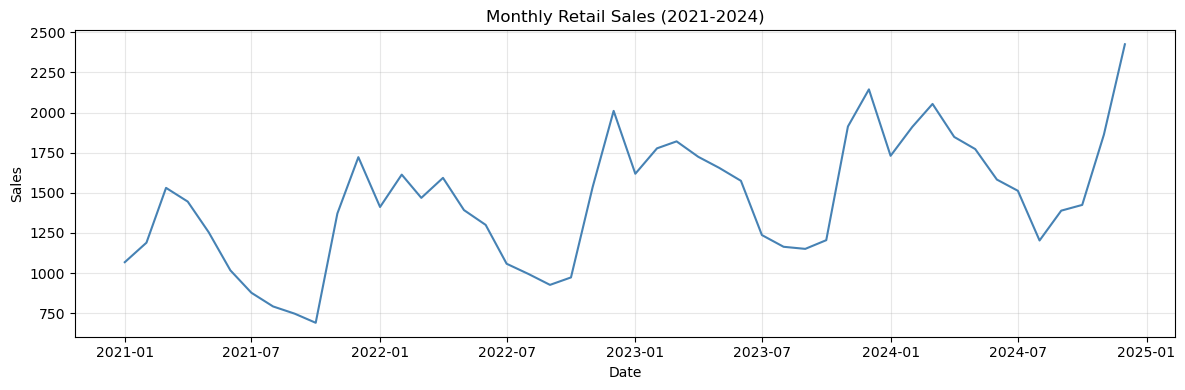

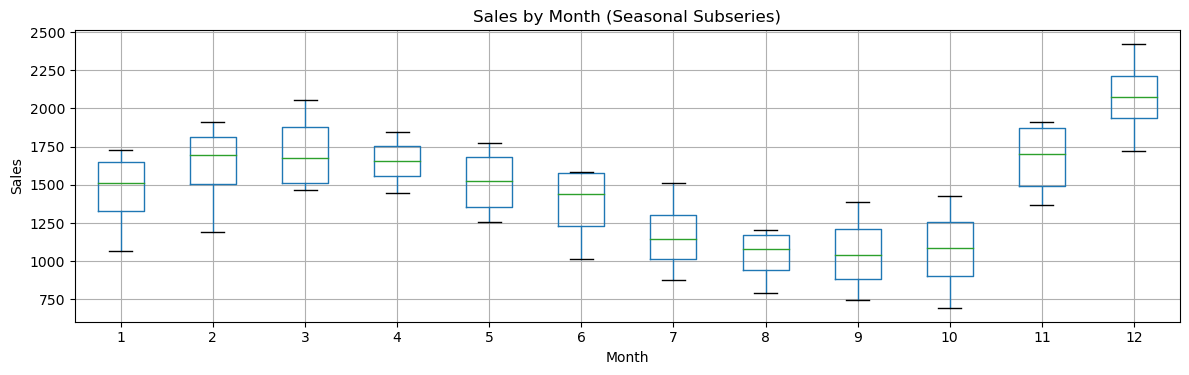

Months with highest average sales:
Month
12    2075.348686
3     1718.268816
11    1670.605119
4     1652.593550
2     1622.441739
Name: Sales, dtype: float64


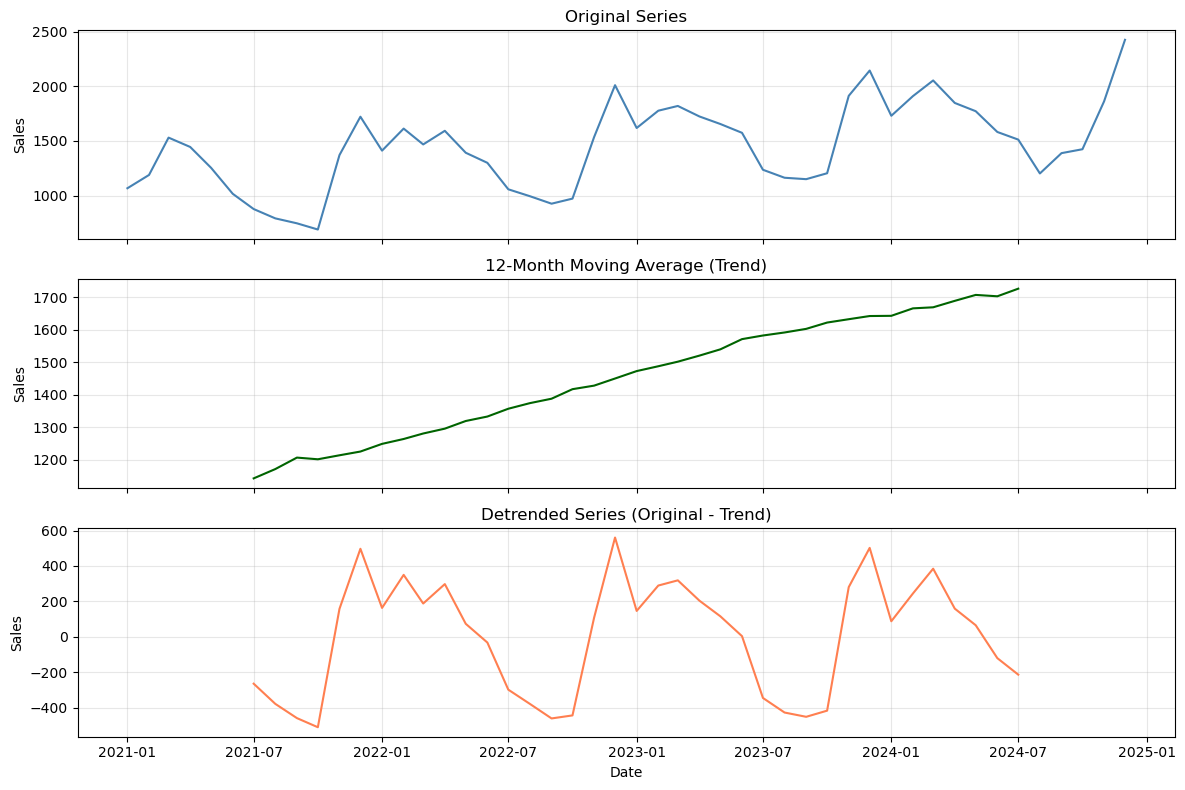

In [9]:
# --------------------------------------------------------------------
# A1 SOLUTION: Exploratory Visualization
# --------------------------------------------------------------------

# 1. Time series plot of monthly sales (full 4-year series)
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df_sales.index, df_sales['Sales'], color='steelblue')
ax.set_title('Monthly Retail Sales (2021-2024)')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Seasonal subseries plot: Box plot of sales by month
fig, ax = plt.subplots(figsize=(12, 4))
df_sales.boxplot(column='Sales', by='Month', ax=ax)
ax.set_title('Sales by Month (Seasonal Subseries)')
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
plt.suptitle('')  # Remove auto title
plt.tight_layout()
plt.show()

# Which months have highest sales?
monthly_means = df_sales.groupby('Month')['Sales'].mean()
print("Months with highest average sales:")
print(monthly_means.sort_values(ascending=False).head())

# 3. Decomposition plot: Original, 12-month MA (trend), Detrended
trend_12m = df_sales['Sales'].rolling(window=12, center=True).mean()
detrended = df_sales['Sales'] - trend_12m

fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
axes[0].plot(df_sales.index, df_sales['Sales'], color='steelblue')
axes[0].set_ylabel('Sales')
axes[0].set_title('Original Series')
axes[0].grid(True, alpha=0.3)

axes[1].plot(df_sales.index, trend_12m, color='darkgreen')
axes[1].set_ylabel('Sales')
axes[1].set_title('12-Month Moving Average (Trend)')
axes[1].grid(True, alpha=0.3)

axes[2].plot(df_sales.index, detrended, color='coral')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('Date')
axes[2].set_title('Detrended Series (Original - Trend)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
    gh auth login -h github.com


SyntaxError: invalid syntax (2402301979.py, line 1)

In [13]:
gh auth login -h github.com

SyntaxError: invalid syntax (1140285263.py, line 1)

In [ ]:
gh auth login -h github.com

SyntaxError: invalid syntax (1140285263.py, line 1)